In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
wine=pd.read_csv('winequality-red.csv')
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


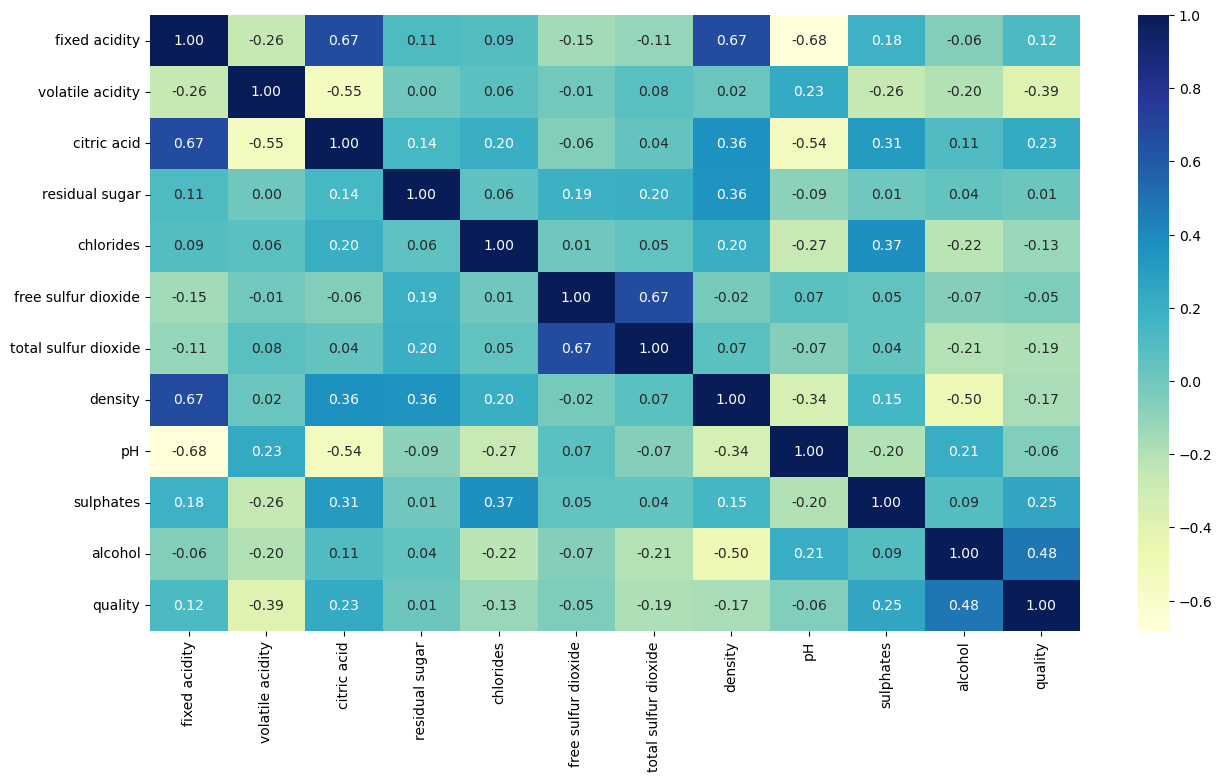

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
cor=wine.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(cor,annot=True,fmt=".2f", cmap="YlGnBu")
plt.show()

In [8]:
#from heat map it is found that no two colums are highly correlated with the quality but they are few which are not related in a better way so removing them can make the predction simpler


In [7]:
features=['fixed acidity',
 'volatile acidity',
 'citric acid','sulphates',
 'alcohol']
x=wine[features]
y=wine['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

C:\Users\Prashanth Chowdary\.conda\envs\Machinelearning\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


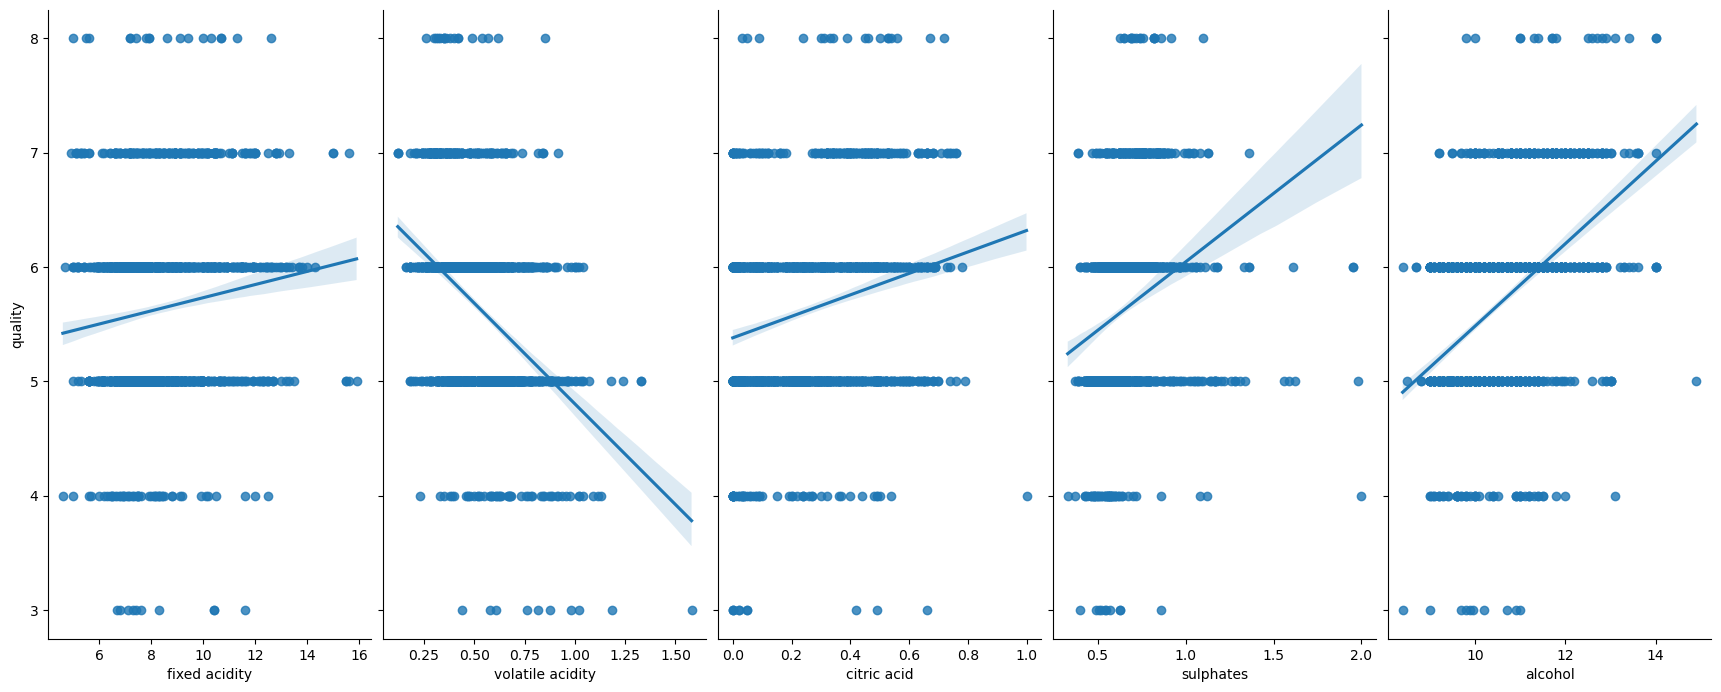

In [12]:
sns.pairplot(wine,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)

In [8]:
print(reg.score(x_test,y_test))

0.3623585103288238


In [9]:
#so the accuracy obtained is 36%
y_predict=reg.predict(x_test)

In [10]:
print(((y_predict-y_test)/y_test).mean()*100)

1.8357970205111813


In [2]:
#using other kind of classification methods like decidion tree can make the score improve

In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.3623585103288238
